## Execute the below code from **Task 1** to create desired **Graph & Adjacency matrix** further  




In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import random
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Modified Network Dataset.xlsx")

# Count total number of elements in column 'Roll Number' to get unique ids
total_students = df['Roll Number'].count()

# Generate nodes from 0 to (total_students - 1)
nodes = range(total_students)

# Create a directed Graph graph
G = nx.DiGraph()

# Add nodes to the graph
for node in nodes:
    G.add_node(node)

# Map roll numbers to nodes
node_roll_number_map = {node : roll_number for node, roll_number in zip(nodes,df['Roll Number'])}

# Create edges
for node, roll_number in node_roll_number_map.items():
    # Get the row index of the DataFrame corresponding to the roll number -> node ~ index
    # Iterate through columns (excluding 'Name' & 'Roll Number')
    for col in df.columns[2:]:
      # Get the roll numbers from the column
      connected_roll_number = df.loc[node, col]
      # Get the node corresponding to the connected roll number
      for connected_node, rn in node_roll_number_map.items():
          if rn == connected_roll_number:
              # Add an edge between the nodes
              G.add_edge(node, connected_node)


# Create Adjacency Matrix using G (Graph) for **Task 2**

In [2]:
#create Adjacency Matrix
adj_matrix = nx.to_numpy_array(G)
print(adj_matrix)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#Applying Standard Algorithm : **Non Negative Matrix Factorization**
#Also Using **Gradient Descent Concept**

In [3]:
import matplotlib.pyplot as plt

def matrix_factorization(R, P, Q, K, steps=200, ALPHA=0.0002):
    # Transpose matrix Q
    Q = Q.T
    # Store errors for each iteration
    errors = []
    # Loop through each iteration
    for step in range(steps):
        # Loop through each row of R
        for i in range(len(R)):
            # Loop through each column of R
            for j in range(len(R[i])):
                # Check if R[i][j] is greater than 0
                if R[i][j] > 0:
                    # Calculate error between R[i][j] and dot product of P[i,:] and Q[:,j]
                    error_ij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    # Update matrices P and Q using gradient descent
                    for k in range(K):
                        P[i][k] = P[i][k] + ALPHA * (2 * error_ij * Q[k][j])
                        Q[k][j] = Q[k][j] + ALPHA * (2 * error_ij * P[i][k])

        # Calculate dot product of matrices P and Q
        eR = np.dot(P,Q)
        # Initialize error
        error_total = 0
        # Loop through each element of R
        for i in range(len(R)):
            for j in range(len(R[i])):
                # Check if R[i][j] is greater than 0
                if R[i][j] > 0:
                    # Calculate squared error between R[i][j] and dot product of P[i,:] and Q[:,j]
                    error_total = error_total + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
        # Append error to errors list
        errors.append(error_total)
        # Check convergence
        if error_total < 0.001:
            break

    # Plot the gradient descent graph
    plt.plot(range(len(errors)), errors)
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.title('Gradient Descent')
    plt.show()

    return P, Q.T


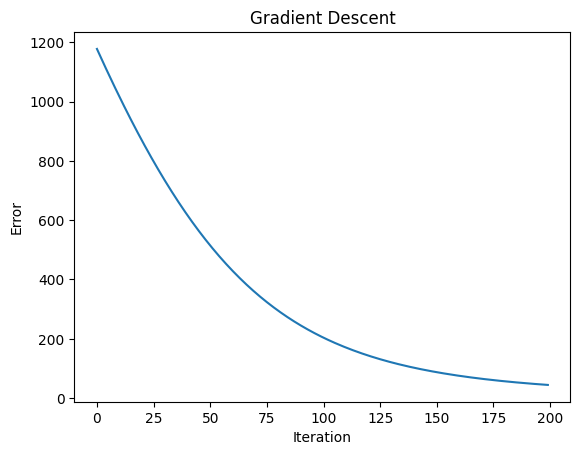

In [4]:
# Initialize the list to store (x, y) pairs
indices_to_subtract = []

# Generate random (x, y) pairs
for _ in range(300):  #300 is 10% of sample ones
    # Generate random x and y coordinates
    x = np.random.randint(0, 143)  # Assuming 143 is the maximum index
    y = np.random.randint(0, 143)

    # Append the pair to the list
    indices_to_subtract.append((x, y))

# Convert the list to a numpy array
indices_to_subtract = np.array(indices_to_subtract)

copy_adj_matrix = np.copy(adj_matrix)
for i, j in indices_to_subtract:
    if copy_adj_matrix[i][j] != 0:
        copy_adj_matrix[i][j] -= 1
# Set the original matrix R to be the adjacency matrix
# R = adj_matrix
R = copy_adj_matrix
# Get the number of students (rows) and students (columns) in R
N = len(R)     # Number of students
M = len(R[0])  # Number of students

# Set latent factor 2 as the matrix entries are binary(0,1)
K = 2

# Initialize random user and item matrices
P = np.random.rand(N, K)  # Students Row
Q = np.random.rand(M, K)  # Students Column

# Perform matrix factorization
nP, nQ = matrix_factorization(R, P, Q, K)


In [5]:
# Multiply nP and the transpose of nQ
result = nP @ nQ.T
result = result / result.max() #Normalize between 0 and 1

In [6]:
# Convert values >= 0.5 to 1, and < 0.5 to 0
result[result >= 0.5] = 1
result[result < 0.5] = 0

# Print the result
result

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       ...,
       [1., 1., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 1.]])

# Visualizing Original v/s Resulting Matrices

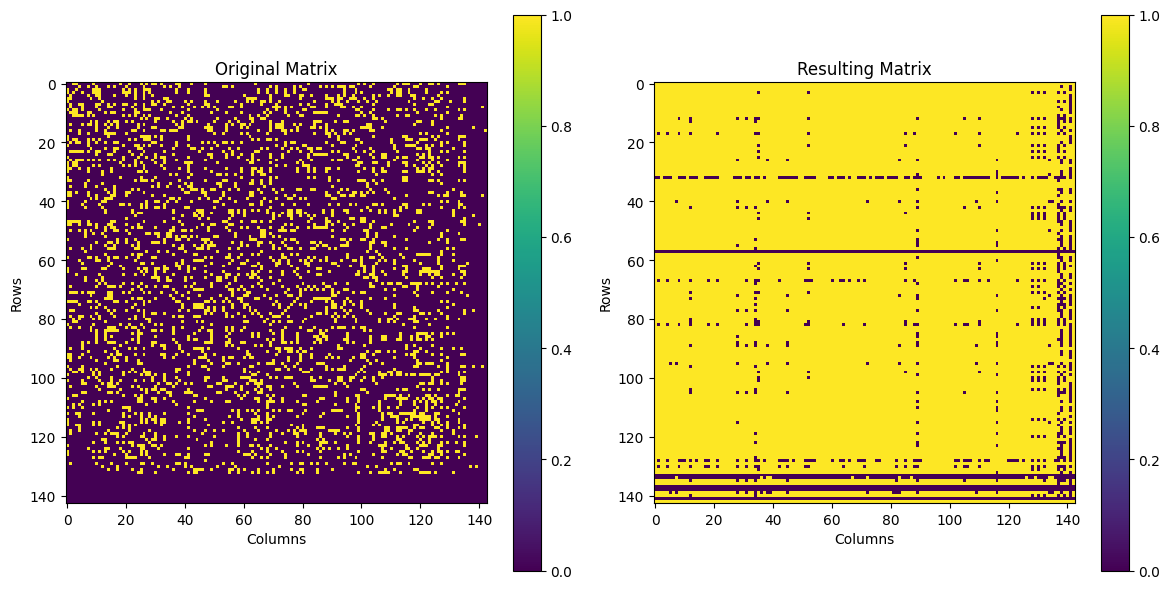

In [7]:
import matplotlib.pyplot as plt

# Create a figure and axis objects for subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original matrix
im1 = axs[0].imshow(adj_matrix, cmap='viridis', interpolation='nearest')
axs[0].set_title('Original Matrix')
axs[0].set_xlabel('Columns')
axs[0].set_ylabel('Rows')
axs[0].grid(False)
fig.colorbar(im1, ax=axs[0])

# Plot the resulting matrix
im2 = axs[1].imshow(result, cmap='viridis', interpolation='nearest')
axs[1].set_title('Resulting Matrix')
axs[1].set_xlabel('Columns')
axs[1].set_ylabel('Rows')
axs[1].grid(False)
fig.colorbar(im2, ax=axs[1])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# **Checking Accuracy**

In [8]:
# Count the number of matching ones
matching_ones = np.sum(np.logical_and(adj_matrix == 1, result == 1))

# Count the total number of ones in the original matrix
total_ones = np.sum(adj_matrix == 1)

# Calculate accuracy
accuracy = matching_ones / total_ones

missing_links = np.sum(result == 1) - np.sum(adj_matrix == 1)

print("Matching Ones:", matching_ones)
print("Total Ones:", total_ones)
print("Accuracy:", accuracy)
print("Missing Links",missing_links)

Matching Ones: 3379
Total Ones: 3438
Accuracy: 0.9828388598022106
Missing Links 15376


Static Data
---
###Matching Ones: **3383**
###Total Ones: **3438**
###Accuracy % = (Matching 1's/Total 1's) x 100 %
###Accuracy -> **98.28**
###Missing Links -> 15376
